In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
dp=pd.read_csv("housing.csv")
dp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
dp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
dp.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
dp.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [10]:
dp.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
dp.dropna(inplace=True)

In [14]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [15]:
dp.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
dp.duplicated().sum()

0

In [17]:
dp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
x = dp.drop(['median_house_value'] , axis=1)
y = dp['median_house_value']


In [26]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)


In [27]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17628,-121.92,37.26,33.0,1306.0,259.0,762.0,237.0,4.5208,<1H OCEAN,230700.0
8453,-118.35,33.91,25.0,1884.0,554.0,1337.0,549.0,2.8512,<1H OCEAN,272800.0
17357,-120.43,34.87,21.0,2131.0,329.0,1094.0,353.0,4.6648,<1H OCEAN,193000.0
5809,-118.27,34.15,7.0,2837.0,776.0,2287.0,736.0,3.0080,<1H OCEAN,229000.0
7660,-118.22,33.84,38.0,1928.0,429.0,1358.0,399.0,4.0687,<1H OCEAN,160300.0
...,...,...,...,...,...,...,...,...,...,...
14504,-117.22,32.87,14.0,3512.0,807.0,1835.0,792.0,3.3500,NEAR OCEAN,171000.0
2914,-119.08,35.36,12.0,6442.0,1116.0,2966.0,1092.0,4.5791,INLAND,123400.0
2218,-119.82,36.83,14.0,2982.0,412.0,1408.0,423.0,5.3241,INLAND,123000.0
8535,-118.35,33.90,22.0,1127.0,287.0,697.0,241.0,3.3971,<1H OCEAN,220300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

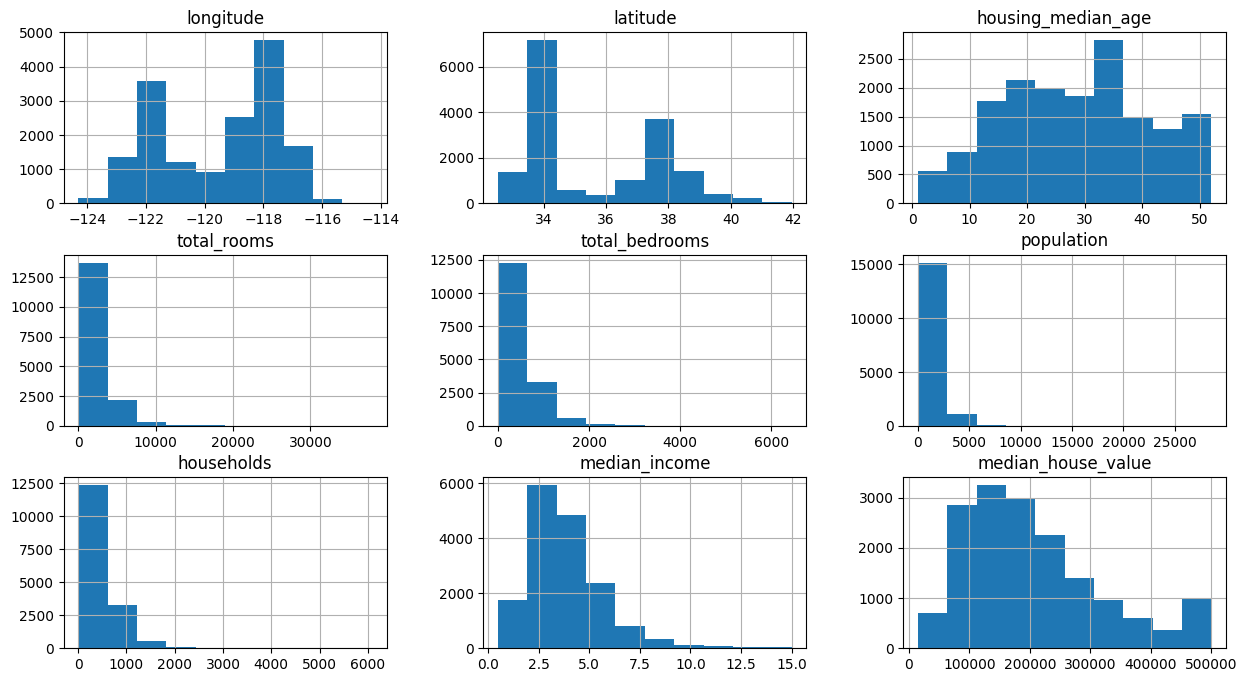

In [28]:
train_data.hist(figsize=(15,8))

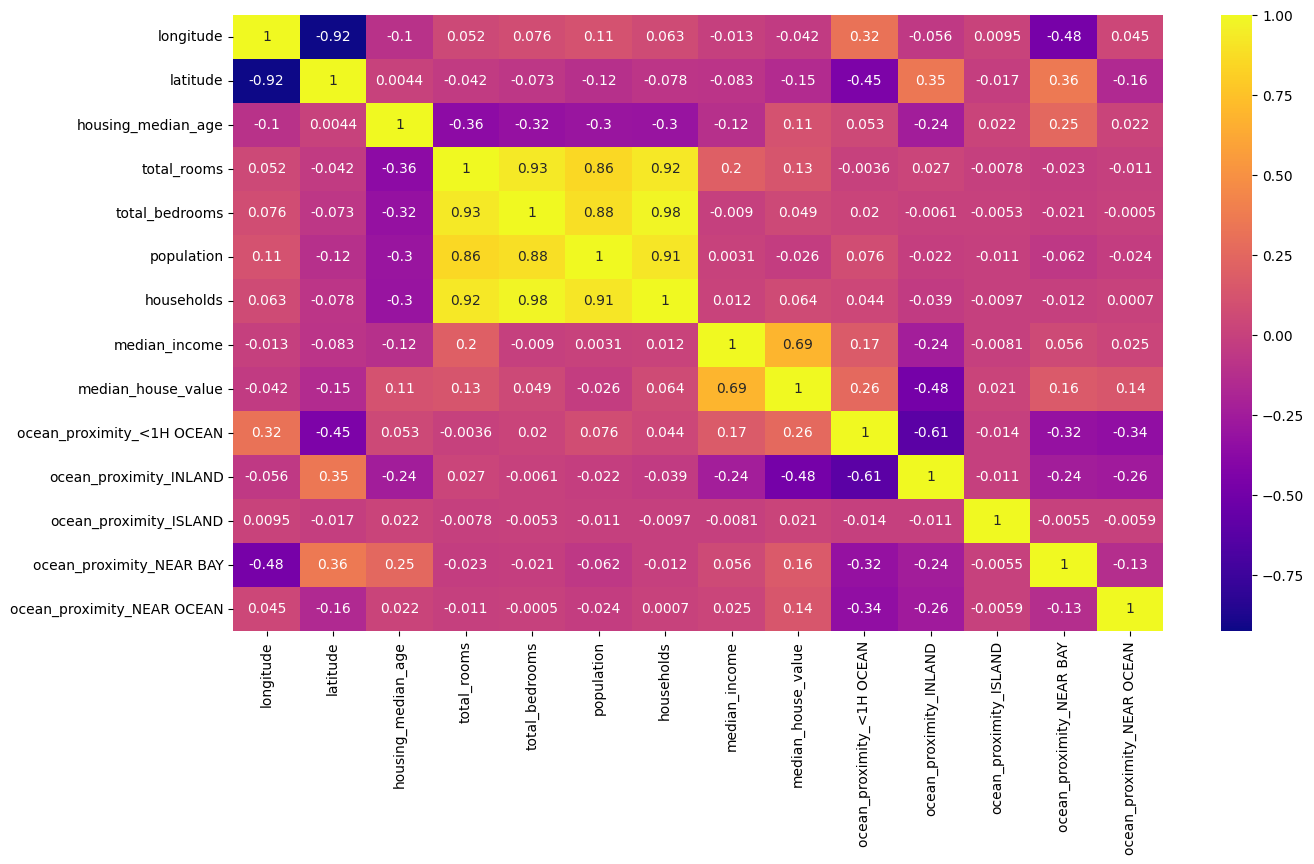

In [35]:
train_data_encoded = pd.get_dummies(train_data, columns=['ocean_proximity'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_encoded.corr(),annot=True , cmap='plasma')
plt.show()

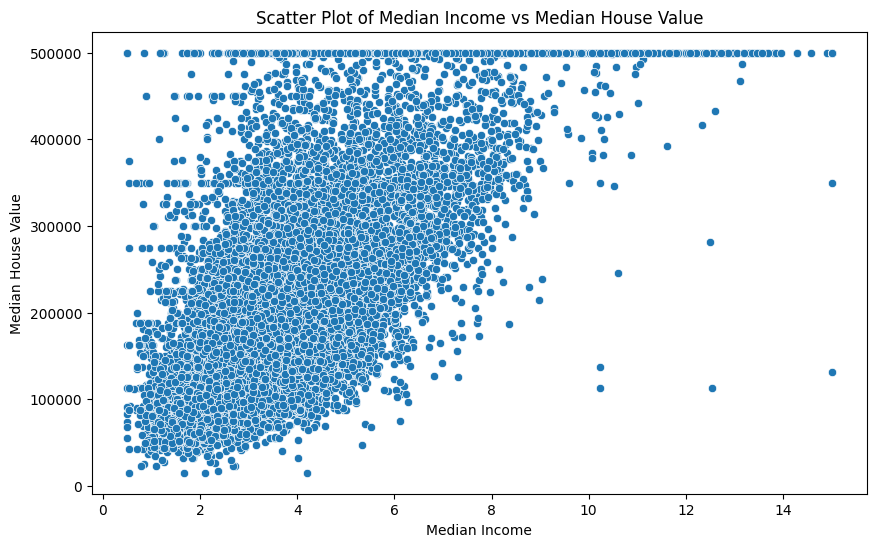

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=train_data_encoded)
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

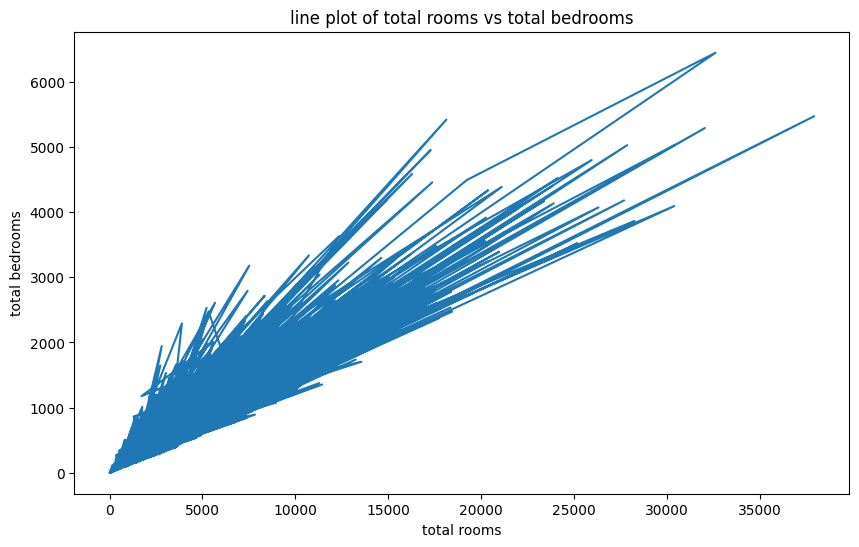

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(train_data_encoded['total_rooms'], train_data_encoded['total_bedrooms'])
plt.title("line plot of total rooms vs total bedrooms")
plt.xlabel("total rooms")
plt.ylabel("total bedrooms")
plt.show()

In [38]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

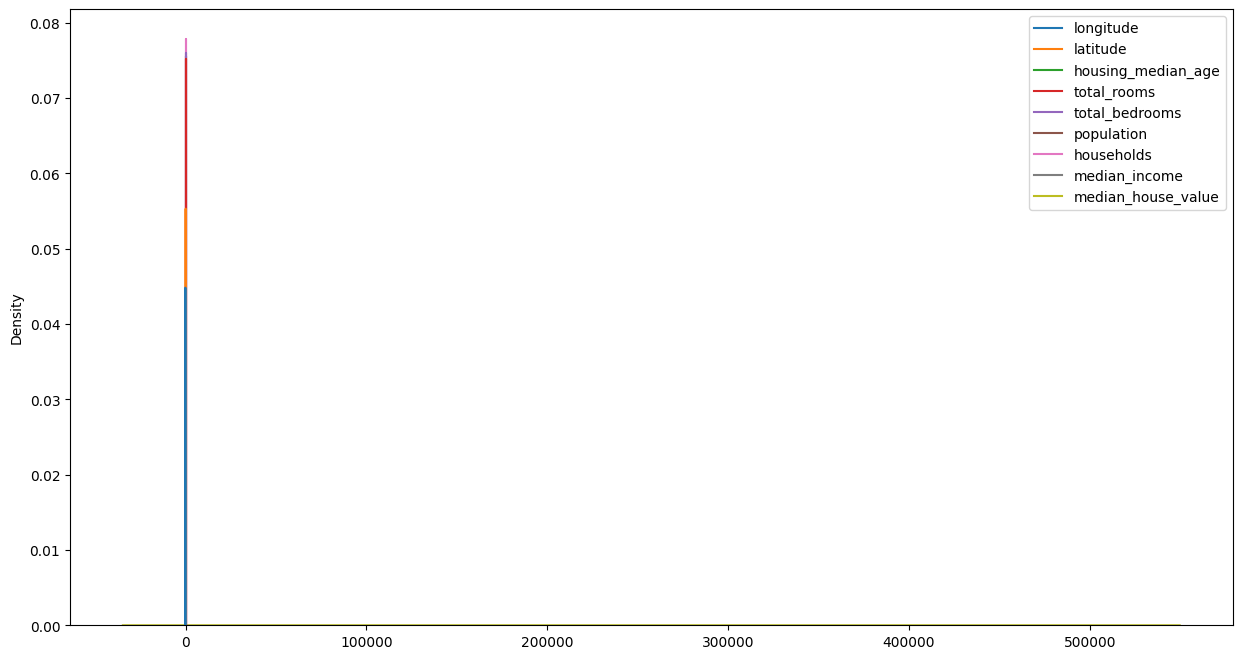

In [40]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=train_data)
plt.show()

In [46]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity' , axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17628,-121.92,37.26,33.0,7.175490,5.560682,6.637258,5.472271,4.5208,230700.0,True,False,False,False,False
8453,-118.35,33.91,25.0,7.541683,6.318968,7.198931,6.309918,2.8512,272800.0,True,False,False,False,False
17357,-120.43,34.87,21.0,7.664816,5.799093,6.998510,5.869297,4.6648,193000.0,True,False,False,False,False
5809,-118.27,34.15,7.0,7.950855,6.655440,7.735433,6.602588,3.0080,229000.0,True,False,False,False,False
7660,-118.22,33.84,38.0,7.564757,6.063785,7.214504,5.991465,4.0687,160300.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,-117.22,32.87,14.0,8.164226,6.694562,7.515345,6.675823,3.3500,171000.0,False,False,False,False,True
2914,-119.08,35.36,12.0,8.770750,7.018402,7.995307,6.996681,4.5791,123400.0,False,True,False,False,False
2218,-119.82,36.83,14.0,8.000685,6.023448,7.250636,6.049733,5.3241,123000.0,False,True,False,False,False
8535,-118.35,33.90,22.0,7.028201,5.662960,6.548219,5.488938,3.3971,220300.0,True,False,False,False,False


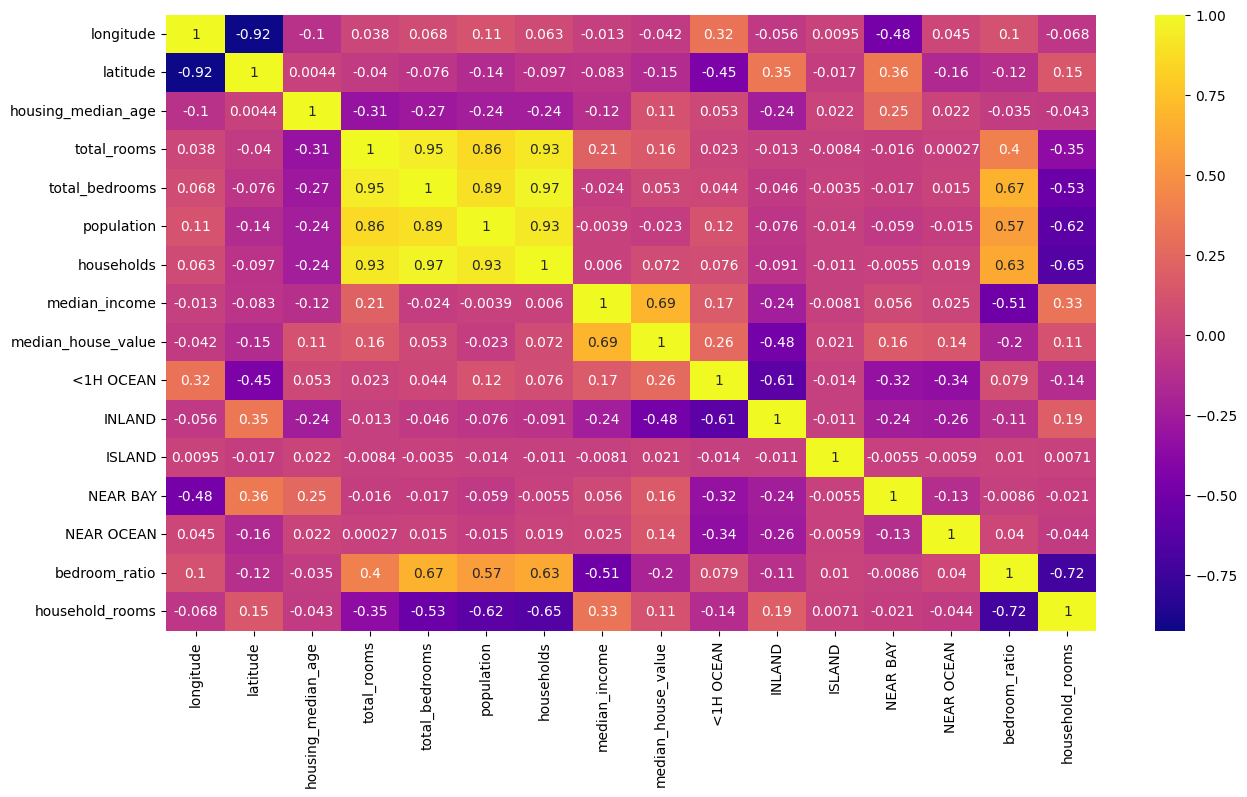

In [61]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot= True , cmap='plasma')
plt.show()

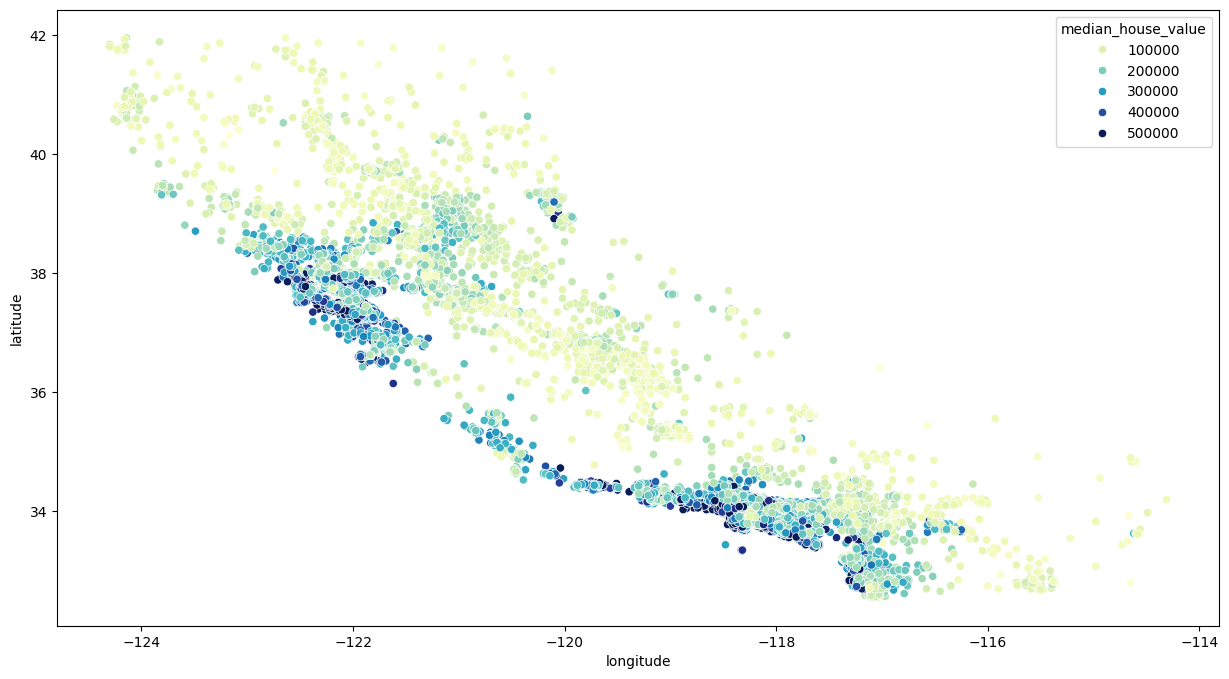

In [48]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude' , y='latitude' , data=train_data , hue='median_house_value' , palette='YlGnBu')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train , y_train = train_data.drop('median_house_value' , axis=1) , train_data['median_house_value'] # Fix the typo in this line, replace '-' with '='
x_train_s=scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [54]:
test_data=x_test.join(y_test)
test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms'] + 1)
test_data['population'] =np.log(test_data['population'] + 1)
test_data['households'] =np.log(test_data['households'] + 1)

test_data-test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity' , axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [63]:
reg.score(x_train , y_train)

0.6691615005995604

In [67]:
x_test = x_test.join(pd.get_dummies(x_test.ocean_proximity)).drop('ocean_proximity', axis=1)

In [69]:
x_test['bedroom_ratio'] = x_test['total_bedrooms'] / x_test['total_rooms']
x_test['household_rooms'] = x_test['total_rooms'] / x_test['households']

In [70]:
x_test_s=scaler.transform(x_test)

In [71]:
reg.score(x_train_s , y_train)

0.6701777639251367

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(x_train_s , y_train)

RandomForestRegressor()

In [73]:
forest.score(x_test_s , y_test)

0.05291458693441431

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    "min_samples_split":[2,4],
    'max_depth': [None, 4 , 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error' , return_train_score=True)
new_var = grid_search.fit(x_train_s, y_train)
new_var  # Fit the GridSearchCV object

grid_search.best_estimator_  # Now you can access best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [84]:
grid_search.best_estimator_.score(x_train_s , y_train)

0.9684197216495015